Di bagian ini, saya memanggil beberapa library utama:

1. Pandas (pd) → untuk **membaca dan mengelola data dalam bentuk tabel** (*DataFrame*).

2. SQLite3 (sqlite3) → agar bisa membuat dan **menjalankan *query* SQL** langsung di dalam Python.

3. Seaborn (sns) & Matplotlib (plt) → untuk **membuat visualisasi** data yang informatif dan menarik.

4. Tabulate (tabulate) → membantu **menampilkan tabel hasil *query*** dengan format yang rapi di terminal.

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

Penjelasan kode dibawah:
===

1. file_path → **menyimpan lokasi file CSV**. Huruf r menandakan *raw string* agar tanda \ pada path tidak menyebabkan error.

2. pd.read_csv() → **membaca file CSV** dan menyimpannya ke variabel df dalam bentuk *DataFrame*.

3. encoding='utf-16' → memastikan file terbaca dengan benar sesuai format teksnya.

4. df.head() → **menampilkan 5 baris pertama** untuk mengecek apakah data berhasil dimuat.


In [3]:
file_path = r"C:\Users\Acer\Documents\Projek Starbuck\Data\starbucks_menu_nutrition_food.csv"

df = pd.read_csv(file_path, encoding='utf-16')

print("Dataset Berhasil dimuatkan")
print(df.head())

Dataset Berhasil dimuatkan
         Unnamed: 0   Calories   Fat (g)   Carb. (g)   Fiber (g)   Protein (g)
0      Chonga Bagel        300       5.0          50           3            12
1      8-Grain Roll        380       6.0          70           7            10
2  Almond Croissant        410      22.0          45           3            10
3     Apple Fritter        460      23.0          56           2             7
4  Banana Nut Bread        420      22.0          52           2             6


Penjelasan kode dibawah:
===

1. df.info() → **menampilkan struktur dataset**, seperti jumlah baris dan kolom, nama kolom, tipe data, dan jumlah nilai non-null (tidak kosong).

2. df.isnull().sum() → **menghitung jumlah data kosong** (*missing values*) di setiap kolom.

3. Tambahan "\n" hanya digunakan untuk **memberi jarak baris** agar output lebih rapi di terminal.

Tujuan membantu memahami bentuk data dan seberapa lengkap isinya sebelum lanjut ke tahap *data cleaning*.


In [4]:
#Cek Struktur dan data yang hilang
print("Informasi Data:")
print(df.info(), "\n")
print("Missing values per kolom:")
print(df.isnull().sum(), "\n")

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    113 non-null    object 
 1    Calories     113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB
None 

Missing values per kolom:
Unnamed: 0      0
 Calories       0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64 



Penjelasan kode dibawah:
===

1. df.rename(columns={...}, inplace=True) → **mengganti nama kolom** lama menjadi lebih pendek dan konsisten (misalnya " Fat (g)" jadi "Fat_g").
Ini penting karena nama kolom yang mengandung spasi atau tanda kurung bisa menyulitkan saat menjalankan *query* SQL atau analisis lanjutan.

2. df.columns → menampilkan daftar nama kolom terbaru setelah perubahan.

3. df.head() → menampilkan contoh data untuk memastikan hasil rename sudah benar.

4. df.dtypes → **menunjukkan tipe data** dari setiap kolom (misalnya *object, float64, int64*).


Langkah ini membuat nama kolom lebih bersih, konsisten, dan mudah diolah untuk analisis

In [11]:
# Ganti nama kolom biar lebih mudah dipakai
df.rename(columns={
    "Unnamed: 0": "Item",
    " Calories": "Calories",
    " Fat (g)": "Fat_g",
    " Carb. (g)": "Carb_g",
    " Fiber (g)": "Fiber_g",
    " Protein (g)": "Protein_g"
}, inplace=True)

#Cek Hasil Setelah Revisi Kolom
print("Kolom setelah pembersihan:")
print(df.columns, "\n")

#Tampilkan 5 Data Pertama
print("Contoh data:")
print(df.head(), "\n")

#Cek Tipe Data Setelah Renaming
print("Tipe data per kolom:")
print(df.dtypes)

Kolom setelah pembersihan:
Index(['Item', 'Calories', 'Fat_g', 'Carb_g', 'Fiber_g', 'Protein_g'], dtype='object') 

Contoh data:
               Item  Calories  Fat_g  Carb_g  Fiber_g  Protein_g
0      Chonga Bagel       300    5.0      50        3         12
1      8-Grain Roll       380    6.0      70        7         10
2  Almond Croissant       410   22.0      45        3         10
3     Apple Fritter       460   23.0      56        2          7
4  Banana Nut Bread       420   22.0      52        2          6 

Tipe data per kolom:
Item          object
Calories       int64
Fat_g        float64
Carb_g         int64
Fiber_g        int64
Protein_g      int64
dtype: object


Penjelasan kode dibawah:
===

1. sqlite3.connect("starbucks.db") → **membuat (atau membuka) database bernama starbucks.db.**

2. df.to_sql("menu", conn, if_exists="replace", index=False) → menyimpan ***DataFrame* df ke tabel bernama menu di dalam database**.

3. print() → **menampilkan pesan** konfirmasi bahwa data berhasil tersimpan.

Tujuan memindahkan dataset ke dalam database SQL lokal (SQLite), membuat data siap untuk dianalisis menggunakan *query* SQL langsung di Python.



In [6]:
#SQLite Database 
conn = sqlite3.connect("starbucks.db")
df.to_sql("menu", conn, if_exists="replace", index=False)
print("\nData stored in SQLite database: 'starbucks.db'")


Data stored in SQLite database: 'starbucks.db'


Memastikan bahwa data dari DataFrame sudah tersimpan sepenuhnya ke dalam tabel SQLite untuk verifikasi sebelum analisis SQL dilanjutkan.

In [7]:
print("Jumlah baris dalam tabel:")
print(pd.read_sql_query("SELECT COUNT(*) as total FROM menu;", conn), "\n")


Jumlah baris dalam tabel:
   total
0    113 



Penjelasan kode dibawah:
===

1. sqlite3.connect("starbucks.db") → membuka koneksi ke database starbucks.db (**koneksi ulang**).

2. PRAGMA table_info(menu); → perintah khusus di SQLite untuk **menampilkan struktur tabel, yaitu daftar kolom beserta tipe data dan informasi lainnya**.

3. pd.read_sql_query(query, conn) → menjalankan *query* dan **menampilkan hasilnya dalam bentuk DataFrame**.

4. conn.close() → **menutup koneksi setelah *query* selesai dijalankan** (praktik yang baik untuk menjaga efisiensi dan keamanan koneksi database).

Untuk memverifikasi struktur tabel menu di database, memastikan semua kolom dari dataset telah tersimpan dengan benar di SQLite sebelum melanjutkan analisis SQL.

In [8]:
conn = sqlite3.connect("starbucks.db")

# Lihat daftar kolom yang ada di tabel 'menu'
query = "PRAGMA table_info(menu);"
columns = pd.read_sql_query(query, conn)
print(columns)

conn.close()

   cid       name     type  notnull dflt_value  pk
0    0       Item     TEXT        0       None   0
1    1   Calories  INTEGER        0       None   0
2    2      Fat_g     REAL        0       None   0
3    3     Carb_g  INTEGER        0       None   0
4    4    Fiber_g  INTEGER        0       None   0
5    5  Protein_g  INTEGER        0       None   0


Penjelasan kode dibawah:
===

-sqlite3.connect("starbucks.db") → membuka koneksi ke database starbucks.db (**koneksi ulang**).

-*Query* SQL **menghitung rata-rata** kalori, lemak, karbohidrat, dan protein dari seluruh menu di tabel menu.

1. AVG() → menghitung nilai **rata-rata**.

2. ROUND(..., 2) → **membulatkan hasil rata-rata hingga dua angka** di belakang koma agar tampil rapi.

-pd.read_sql_query(query, conn) → **menjalankan *query* SQL dan menyimpan hasilnya dalam bentuk DataFrame avg_nutrition**.

-avg_nutrition.to_string(index=False) → **menampilkan hasil** tanpa indeks agar *output* terlihat lebih bersih.

-conn.close() → **menutup koneksi** database setelah proses selesai.

Untuk menghitung rata-rata kandungan nutrisi menu Starbucks, memberikan gambaran umum tentang seberapa tinggi nilai gizi rata-rata di seluruh menu.

In [9]:
#Hubungkan ke database SQLite
conn = sqlite3.connect("starbucks.db")

#Query: Analisis Dasar Rata-rata Nutrisi
query = """
SELECT 
    ROUND(AVG(Calories), 2) AS avg_calories,
    ROUND(AVG(Fat_g), 2) AS avg_fat,
    ROUND(AVG(Carb_g), 2) AS avg_carb,
    ROUND(AVG(Protein_g), 2) AS avg_protein
FROM menu;
"""

#Jalankan query dan simpan hasilnya
avg_nutrition = pd.read_sql_query(query, conn)

#Tampilkan hasil
print("Rata-rata Kandungan Nutrisi Menu Starbucks:")
print(avg_nutrition.to_string(index=False))

#Tutup koneksi
conn.close()

Rata-rata Kandungan Nutrisi Menu Starbucks:
 avg_calories  avg_fat  avg_carb  avg_protein
       356.64    16.35     41.49        11.47


Penjelasan kode dibawah:
===
-sqlite3.connect("starbucks.db") → membuka koneksi ke database starbucks.db (**koneksi ulang**).

-*Query* SQL mengambil kolom Item, Calories, Fat_g, Carb_g, dan Protein_g dari tabel menu, lalu:

1. ORDER BY Calories DESC → **mengurutkan menu** berdasarkan kalori tertinggi ke terendah.

2. LIMIT 5 → hanya **menampilkan 5 menu teratas**.

-pd.read_sql_query() → **mengeksekusi *query*** dan mengubah hasilnya menjadi *DataFrame*.

-tabulate() → **menampilkan hasil** dengan tampilan tabel yang rapi di *console* (format "fancy_grid" menambah estetika output).

-conn.close() → **menutup koneksi** database setelah *query* selesai dijalankan.

untuk mengidentifikasi menu dengan kalori tertinggi di Starbucks, membantu memahami produk mana yang paling tinggi kandungan energinya.

In [ ]:
# Buat koneksi ulang
conn = sqlite3.connect("starbucks.db")

# Query: Menu dengan Kalori Tertinggi
query = """
SELECT Item, Calories, Fat_g, Carb_g, Protein_g
FROM menu
ORDER BY Calories DESC
LIMIT 5;
"""

# Jalankan query dan simpan hasilnya ke DataFrame
top_calories = pd.read_sql_query(query, conn)

# Tampilkan hasil dalam format tabel yang rapi
print("MENU DENGAN KALORI TERTINGG\n")
print(tabulate(
    top_calories,
    headers=["Item", "Kalori", "Lemak (g)", "Karbo (g)", "Protein (g)"],
    tablefmt="fancy_grid",
    showindex=False
))

# Tutup koneksi
conn.close()

MENU DENGAN KALORI TERTINGGI

╒══════════════════════════════════════════════════╤══════════╤═════════════╤═════════════╤═══════════════╕
│ Item                                             │   Kalori │   Lemak (g) │   Karbo (g) │   Protein (g) │
╞══════════════════════════════════════════════════╪══════════╪═════════════╪═════════════╪═══════════════╡
│ Lentils & Vegetable Protein Bowl with Brown Rice │      650 │          29 │          80 │            23 │
├──────────────────────────────────────────────────┼──────────┼─────────────┼─────────────┼───────────────┤
│ Green Goddess Avocado Salad                      │      620 │          37 │          62 │            13 │
├──────────────────────────────────────────────────┼──────────┼─────────────┼─────────────┼───────────────┤
│ Strawberries & Jam Sandwich                      │      600 │          25 │          80 │            19 │
├──────────────────────────────────────────────────┼──────────┼─────────────┼─────────────┼───────────────

Penjelasan kode dibawah:
===

sqlite3.connect("starbucks.db") → membuka koneksi ke database starbucks.db (**koneksi ulang**).

Query SQL:

1. SELECT **memilih kolom** Item, Calories, dan Fat_g.

2. Kolom diberi alias agar nama tampil lebih rapi saat dicetak (Calories AS 'Kalori', Fat_g AS 'Lemak (g)').

3. ORDER BY Fat_g DESC **mengurutkan data** berdasarkan nilai lemak tertinggi ke terendah.

4. LIMIT 5 **hanya menampilkan 5 menu teratas**.

pd.read_sql_query() → **menjalankan *query* SQL dan menyimpan hasilnya** dalam *DataFrame* top_fat.

tabulate() → **menampilkan hasilnya dalam bentuk tabel**.

Untuk mengidentifikasi menu dengan kadar lemak tertinggi di Starbucks, membantu memahami produk mana yang paling tinggi kandungan lemaknya.

In [13]:
conn = sqlite3.connect("starbucks.db")

#Menu dengan Lemak Tertinggi
query_fat = """
SELECT Item, Calories AS 'Kalori', Fat_g AS 'Lemak (g)'
FROM menu
ORDER BY Fat_g DESC
LIMIT 5;
"""
top_fat = pd.read_sql_query(query_fat, conn)

print("\nMENU DENGAN LEMAK TERTINGGI\n")
print(tabulate(top_fat, headers='keys', tablefmt='fancy_grid', showindex=False))



MENU DENGAN LEMAK TERTINGGI

╒═══════════════════════════════════════════════════════╤══════════╤═════════════╕
│ Item                                                  │   Kalori │   Lemak (g) │
╞═══════════════════════════════════════════════════════╪══════════╪═════════════╡
│ Green Goddess Avocado Salad                           │      620 │          37 │
├───────────────────────────────────────────────────────┼──────────┼─────────────┤
│ Roasted Turkey & Dill Havarti Sandwich                │      600 │          32 │
├───────────────────────────────────────────────────────┼──────────┼─────────────┤
│ Spicy Chorizo  Monterey Jack & Egg Breakfast Sandwich │      500 │          30 │
├───────────────────────────────────────────────────────┼──────────┼─────────────┤
│ Farmers' Market Protein Box                           │      470 │          29 │
├───────────────────────────────────────────────────────┼──────────┼─────────────┤
│ Seared Steak & Cheddar Sandwich                       │

Penjelasan kode dibawah:
===

-Query SQL:

1. SELECT **memilih kolom** Item, Calories, dan Protein_g.

2. Menggunakan alias agar nama kolom tampil lebih deskriptif ('Kalori' dan 'Protein (g)').

3. ORDER BY Protein_g DESC → **mengurutkan data** berdasarkan nilai protein dari tertinggi ke terendah.

4. LIMIT 5 → hanya menampilkan lima menu dengan protein terbanyak.

-pd.read_sql_query() → **menjalankan *query* dan menyimpan hasil** ke *DataFrame* top_protein.

-tabulate() → **menampilkan hasilnya dalam format tabel** dengan gaya "fancy_grid".

untuk mengidentifikasi menu dengan kandungan protein tertinggi, memberikan insight tentang pilihan menu Starbucks yang paling kaya protein.

In [22]:
#Menu dengan Protein Tertinggi
query_protein = """
SELECT Item, Calories AS 'Kalori', Protein_g AS 'Protein (g)'
FROM menu
ORDER BY Protein_g DESC
LIMIT 5;
"""
top_protein = pd.read_sql_query(query_protein, conn)

print("\n MENU DENGAN PROTEIN TERTINGGI\n")
print(tabulate(top_protein, headers='keys', tablefmt='fancy_grid', showindex=False))


 MENU DENGAN PROTEIN TERTINGGI

╒═══════════════════════════════════════════════════════════╤══════════╤═══════════════╕
│ Item                                                      │   Kalori │   Protein (g) │
╞═══════════════════════════════════════════════════════════╪══════════╪═══════════════╡
│ Turkey Pesto Panini                                       │      560 │            34 │
├───────────────────────────────────────────────────────────┼──────────┼───────────────┤
│ Roasted Turkey & Dill Havarti Sandwich                    │      600 │            32 │
├───────────────────────────────────────────────────────────┼──────────┼───────────────┤
│ Turkey & Havarti Sandwich                                 │      460 │            29 │
├───────────────────────────────────────────────────────────┼──────────┼───────────────┤
│ Za'atar Chicken & Lemon Tahini Salad                      │      570 │            27 │
├───────────────────────────────────────────────────────────┼──────────┼─────

Penjelasan kode dibawah
===

-Ambil data dari database SQLite = Mengambil kolom Calories, Fat_g, Carb_g, dan Protein_g dari tabel menu.

-Hitung korelasi antarvariabel

1. Fungsi df.corr() **menghitung koefisien korelasi *Pearson***, yang mengukur seberapa kuat dua variabel saling berhubungan.

2. Nilai korelasi berada di antara -1 hingga 1: 1 → hubungan positif sempurna; 0 → tidak ada hubungan; -1 → hubungan negatif sempurna

-tabulate() **membuat tampilan tabel**.

-Menggunakan *heatmap* (sns.heatmap) agar **hubungan antar-nutrisi lebih mudah dibaca secara visual**.

untuk melihat hubungan antara kalori dan kandungan nutrisi lain


KORELASI ANTAR NUTRISI

╒═══════════╤════════════╤═════════╤══════════╤═════════════╕
│           │   Calories │   Fat_g │   Carb_g │   Protein_g │
╞═══════════╪════════════╪═════════╪══════════╪═════════════╡
│ Calories  │       1.00 │    0.83 │     0.71 │        0.62 │
├───────────┼────────────┼─────────┼──────────┼─────────────┤
│ Fat_g     │       0.83 │    1.00 │     0.28 │        0.42 │
├───────────┼────────────┼─────────┼──────────┼─────────────┤
│ Carb_g    │       0.71 │    0.28 │     1.00 │        0.20 │
├───────────┼────────────┼─────────┼──────────┼─────────────┤
│ Protein_g │       0.62 │    0.42 │     0.20 │        1.00 │
╘═══════════╧════════════╧═════════╧══════════╧═════════════╛


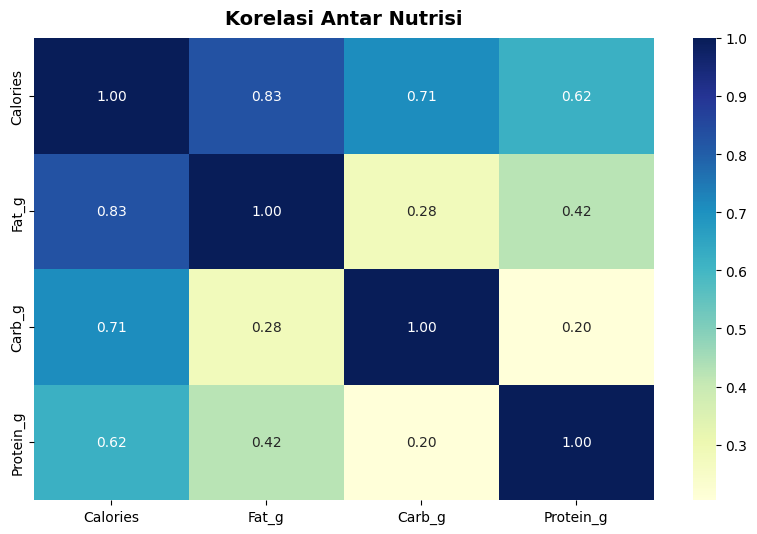

In [21]:
conn = sqlite3.connect("starbucks.db")

# Korelasi Kalori dengan Nutrisi Lain
print("\nKORELASI ANTAR NUTRISI\n")

# Ambil data dari database
df = pd.read_sql_query("SELECT Calories, Fat_g, Carb_g, Protein_g FROM menu", conn)

# Hitung korelasi
corr = df.corr()

# Tampilkan matriks korelasi dalam bentuk tabel
print(tabulate(corr, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Korelasi Antar Nutrisi", fontweight='bold', fontsize=14, pad=10)
plt.show()


Insight utama dari hasil yang diperoleh
==========

1. Lemak memiliki pengaruh terbesar terhadap total kalori (r = 0.83).
Ini menunjukkan bahwa mayoritas menu tinggi kalori di Starbucks cenderung juga tinggi lemak.

2. Karbohidrat juga berperan penting (r = 0.71), terutama pada menu minuman manis dan bakery.

3. Protein memiliki kontribusi sedang (r = 0.62), umum pada menu makanan seperti sandwich atau breakfast items.

Dari analisis korelasi, ditemukan bahwa **kandungan kalori menu Starbucks paling dipengaruhi oleh kadar lemak dan karbohidrat**. Hal ini menggambarkan bahwa **menu berkalori tinggi umumnya berasal dari bahan yang kaya lemak dan gula**. Visualisasi heatmap memperkuat pola ini, memberikan gambaran jelas tentang hubungan antar-nutrisi dalam menu Starbucks.



Penjelasan Kode Dibawah:
====

-Kriteria keseimbangan nutrisi:

1. Calories BETWEEN 300 AND 450 → **memilih menu dengan kalori sedang** (tidak terlalu tinggi).

2. Protein_g >= 15 → hanya**mengambil menu dengan protein minimal 15 gram**.

3. Fat_g <= 15 → **memastikan kandungan lemak tetap rendah**.

-ORDER BY Protein_g DESC → **mengurutkan hasil** berdasarkan kadar protein tertinggi.

-pd.read_sql_query() → menjalankan *query* dan menyimpan hasilnya ke *DataFrame* balanced_menu.

-if balanced_menu.empty → menambahkan error *handling*, **jadi kalau tidak ada menu yang cocok, program tetap menampilkan pesan**.

-tabulate() → membuat tampilan tabel.

In [32]:
query_balanced = """
SELECT Item, Calories AS 'Kalori', Fat_g AS 'Lemak (g)', Protein_g AS 'Protein (g)'
FROM menu
WHERE Calories BETWEEN 300 AND 450
  AND Protein_g >= 15
  AND Fat_g <= 15
ORDER BY Protein_g DESC;
"""
balanced_menu = pd.read_sql_query(query_balanced, conn)

print("\nMENU 'SEIMBANG' (Kalori Sedang, Protein Tinggi, Lemak Rendah)\n")
if balanced_menu.empty:
    print("Tidak ada menu yang memenuhi kriteria keseimbangan nutrisi ini.")
else:
    print(tabulate(balanced_menu, headers='keys', tablefmt='fancy_grid', showindex=False))



MENU 'SEIMBANG' (Kalori Sedang, Protein Tinggi, Lemak Rendah)

╒════════════════════════════════════════════╤══════════╤═════════════╤═══════════════╕
│ Item                                       │   Kalori │   Lemak (g) │   Protein (g) │
╞════════════════════════════════════════════╪══════════╪═════════════╪═══════════════╡
│ Smoked Turkey Protein Box                  │      360 │          12 │            24 │
├────────────────────────────────────────────┼──────────┼─────────────┼───────────────┤
│ Honey BBQ Sriracha Chicken Sandwich        │      360 │           7 │            22 │
├────────────────────────────────────────────┼──────────┼─────────────┼───────────────┤
│ Herbed Chicken & Fig Spread Small Sandwich │      300 │           8 │            19 │
├────────────────────────────────────────────┼──────────┼─────────────┼───────────────┤
│ Lemon Chiffon Yogurt                       │      340 │          13 │            18 │
├────────────────────────────────────────────┼──────────

Analisis ini bertujuan untuk menemukan menu Starbucks yang **memiliki keseimbangan antara kalori, protein, dan lemak, cocok untuk pelanggan yang ingin menjaga asupan gizi tanpa mengorbankan rasa**
.


Penjelasan kode dibawah:
=====

1. CAST(Protein_g AS FLOAT) → **mengubah nilai protein menjadi tipe numerik *float* agar bisa dibagi dengan benar**.

2. Protein_g / Calories → **menghitung rasio protein per kalori**, menggambarkan seberapa “padat gizi” suatu menu.

3. ROUND(..., 3) →**membulatkan hasil** hingga 3 angka desimal agar lebih rapi.

4. ORDER BY Protein_per_Calorie DESC → **mengurutkan dari yang paling efisien** (protein terbanyak per kalori).

5. LIMIT 5 → menampilkan 5 menu terbaik berdasarkan efisiensi nutrisi.

6. tabulate() → menampilkan hasil dalam tabel.


In [ ]:
# Ranking Nutrisi Berdasarkan Efisiensi (Protein per Kalori)
query_efficiency = """
SELECT 
    Item, 
    Protein_g AS 'Protein (g)', 
    Calories AS 'Kalori',
    ROUND(CAST(Protein_g AS FLOAT) / Calories, 3) AS 'Protein_per_Calorie'
FROM menu
ORDER BY Protein_per_Calorie DESC
LIMIT 5;
"""
efficient_menu = pd.read_sql_query(query_efficiency, conn)

print("\nRANKING MENU BERDASARKAN EFISIENSI PROTEIN PER KALORI\n")
print(tabulate(efficient_menu, headers='keys', tablefmt='fan cy_grid', showindex=False))


RANKING MENU BERDASARKAN EFISIENSI PROTEIN PER KALORI

╒═══════════════════════════════════════════════════════════════════╤═══════════════╤══════════╤═══════════════════════╕
│ Item                                                              │   Protein (g) │   Kalori │   Protein_per_Calorie │
╞═══════════════════════════════════════════════════════════════════╪═══════════════╪══════════╪═══════════════════════╡
│ Sous Vide Egg Bites: Egg White & Red Pepper                       │            13 │      170 │                 0.076 │
├───────────────────────────────────────────────────────────────────┼───────────────┼──────────┼───────────────────────┤
│ Reduced-Fat Turkey Bacon & Cage Free Egg White Breakfast Sandwich │            16 │      230 │                 0.07  │
├───────────────────────────────────────────────────────────────────┼───────────────┼──────────┼───────────────────────┤
│ Smoked Turkey Protein Box                                         │            24 │      360 │ 

Analisis ini menunjukkan pendekatan data-driven untuk memahami nilai gizi menu Starbucks.
Dengan **membandingkan rasio protein terhadap kalori, kita bisa mengidentifikasi menu yang memberi asupan protein optimal tanpa menambah banyak kalori**, ideal bagi pelanggan yang memperhatikan keseimbangan nutrisi

Insight Analisis
====

1. Menu Sous Vide Egg Bites: Egg White & Red Pepper menempati posisi teratas dengan rasio 0.076, artinya **setiap 1 kalori yang dikonsumsi memberikan kontribusi protein paling tinggi**.

2. Semua menu di daftar ini **memiliki fokus pada bahan rendah lemak dan tinggi protein**, cocok untuk pola makan sehat atau high-protein diet.

3. Menu seperti Turkey Bacon Sandwich dan Protein Box menunjukkan bahwa **makanan siap saji juga bisa bernilai gizi tinggi bila dikombinasikan dengan cermat**.

Penjelasan kode dibawah:
====

-plt.figure(figsize=(10,6)) → mengatur ukuran gambar agar tampil proporsional dan mudah dibaca.

-sns.histplot() → **membuat histogram** untuk menampilkan sebaran nilai kalori:

1. bins=15 → **membagi rentang kalori menjadi 15 kelompok.**

2. kde=True → menambahkan Kernel *Density Estimate* (garis halus) untuk **memperlihatkan bentuk distribusi data**.

3. color='skyblue' → **memberi warna lembut** agar visual enak dilihat.

-Label dan judul → memberi konteks jelas tentang makna grafik.

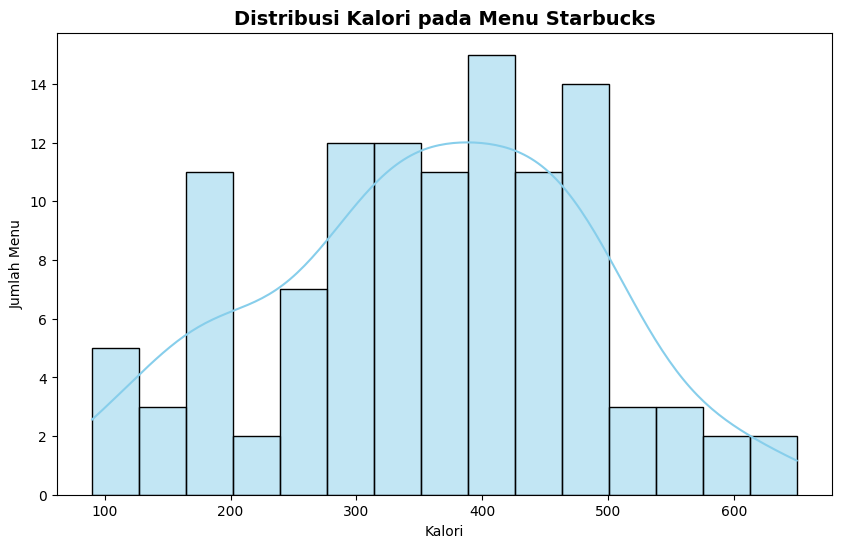

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['Calories'], bins=15, kde=True, color='skyblue')
plt.title("Distribusi Kalori pada Menu Starbucks", fontsize=14, fontweight='bold')
plt.xlabel("Kalori")
plt.ylabel("Jumlah Menu")
plt.show()

In [40]:
# Buka koneksi ke database
conn = sqlite3.connect("starbucks.db")

# Ambil data lengkap (termasuk kolom Item)
df = pd.read_sql_query("SELECT * FROM menu", conn)
conn.close()

# Pastikan kolom sudah lengkap
print(df.columns)

Index(['Item', 'Calories', 'Fat_g', 'Carb_g', 'Fiber_g', 'Protein_g'], dtype='object')


Penjelasan kode dibawah:
===

1. df.nlargest(10, 'Calories') →mengambil 10 menu dengan kalori tertinggi dari dataset.

2. sns.barplot() → **membuat horizontal bar chart dengan warna gradasi merah** (palette='Reds_r'), cocok untuk menonjolkan nilai tinggi.

3. plt.text() → **menambahkan label angka kalori di ujung setiap bar**, supaya hasilnya lebih jelas dan mudah dibaca.

C:\Users\Acer\AppData\Local\Temp\ipykernel_17920\2899710400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Item', x='Calories', data=top10_cal, palette='Reds_r')


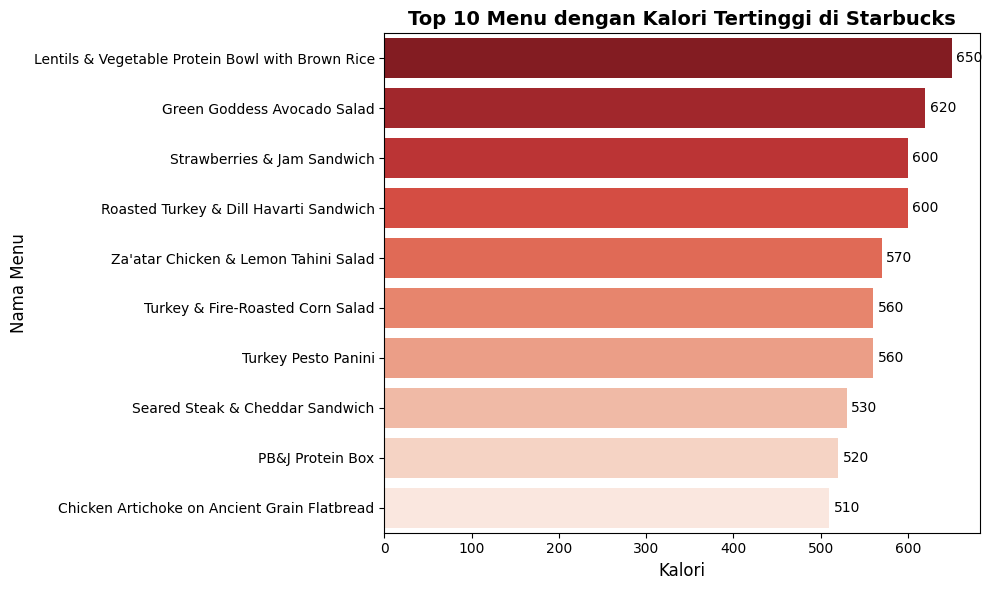

In [42]:
# Ambil 10 menu dengan kalori tertinggi
top10_cal = df.nlargest(10, 'Calories')[['Item', 'Calories']]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y='Item', x='Calories', data=top10_cal, palette='Reds_r')

# Judul & label
plt.title("Top 10 Menu dengan Kalori Tertinggi di Starbucks", fontsize=14, weight='bold')
plt.xlabel("Kalori", fontsize=12)
plt.ylabel("Nama Menu", fontsize=12)

# Tambahkan nilai di ujung bar
for index, value in enumerate(top10_cal['Calories']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()